In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import re

# Loading the Data

In [2]:
# def get_k(name: str):
#     bench_name = name.split('/')[0]
#     k_specifier = bench_name.split("_")[-1]
#     return int(k_specifier[1:])
# 
# 
# def simplify_name(name: str):
#     if re.match("^BM_naive_sampler*", name):
#         return "Naive"
#     if re.match("^BM_seq_priority_sampler*", name):
#         return "SeqPriority"
#     if re.match("^BM_par_priority_sampler*", name):
#         return "ParPriority"
#     if re.match("^BM_seq_permutation_sampler*", name):
#         return "SeqPermutation"
#     if re.match("^BM_par_permutation_sampler*", name):
#         return "ParPermutation"

In [3]:
# original_json = json.load(open('results.json'))
# original_df = pd.DataFrame(original_json["benchmarks"])
# original_df.drop(
#     columns=["family_index", "per_family_instance_index", "run_name", "run_type", "repetition_index", "repetitions",
#              "iterations", "cpu_time"], inplace=True)
# original_df["k_percent"] = original_df["name"].apply(get_k)
# original_df["name"] = original_df["name"].apply(simplify_name)
# original_df

In [4]:
# single_core = original_df[original_df["threads"] == 1]
# multi_core = original_df[original_df["threads"] == 12]

# Plotting Results

In [5]:
# names = [name for name in original_df["name"].unique()]
# 
# colors = mpl.colormaps.get_cmap("Dark2")
# colors = [colors(i) for i in range(len(names))]
# 
# custom_legends = [
#     mpl.lines.Line2D([0], [0], marker="o", color="w", markerfacecolor=colors[i], label=name)
#     for i, name in enumerate(names)
# ]
# 
# names, colors

In [6]:
# fig = plt.figure(figsize=(13, 4))
# 
# ax1 = fig.add_subplot(1, 2, 1)
# ax2 = fig.add_subplot(1, 2, 2, sharey=ax1)
# 
# ax1.set_title("1-thread")
# ax1.set_yscale("log")
# ax1.set_xlabel("k (%)")
# 
# ax2.set_title("12-thread")
# ax2.set_ylabel("Time (ms)")
# ax2.set_xlabel("k (%)")
# 
# for name, color in zip(names, colors):
#     ax1.scatter(single_core[single_core["name"] == name]["k_percent"],
#                 single_core[single_core["name"] == name]["real_time"], color=color)
#     ax2.scatter(multi_core[multi_core["name"] == name]["k_percent"],
#                 multi_core[multi_core["name"] == name]["real_time"], color=color)
# 
# fig.legend(handles=custom_legends, loc="lower center", bbox_to_anchor=(0.5, -0.1), ncol=6)

# My own BM

In [7]:
single_core = pd.read_csv("my_bench_results_1.csv")
multi_core = pd.read_csv("my_bench_results_12.csv")
hyper_core = pd.read_csv("my_bench_results_24.csv")

In [8]:
names = [name for name in single_core["algo"].unique()]
colors = mpl.colormaps.get_cmap("tab10")
colors = [colors(i) for i in range(len(names))]
custom_legends = [
    mpl.lines.Line2D([0], [0], marker="o", color="w", markerfacecolor=colors[i], label=name)
    for i, name in enumerate(names)
]

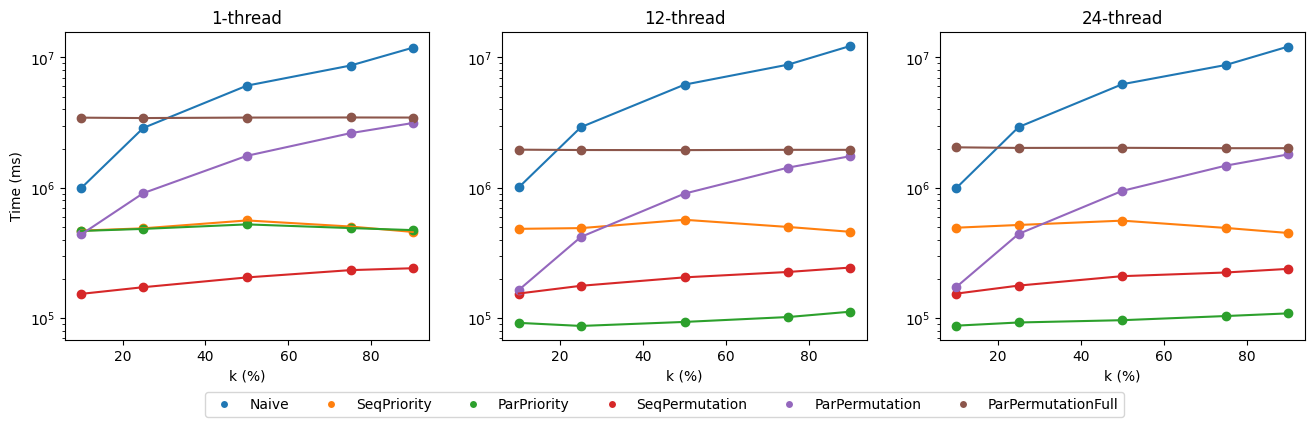

In [9]:
fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2, sharey=ax1)
ax3 = fig.add_subplot(1, 3, 3, sharey=ax1)

ax1.set_title("1-thread")
ax1.set_yscale("log")
ax1.set_ylabel("Time (ms)")
ax1.set_xlabel("k (%)")

ax2.set_title("12-thread")
ax2.set_xlabel("k (%)")

ax3.set_title("24-thread")
ax3.set_xlabel("k (%)")

for name, color in zip(names, colors):
    ax1.plot(sorted(single_core["k%"].unique()),
             single_core[single_core["algo"] == name].groupby("k%")["time(ms)"].mean(), color=color)
    ax1.scatter(sorted(single_core["k%"].unique()),
                single_core[single_core["algo"] == name].groupby("k%")["time(ms)"].mean(), color=color)
    ax2.plot(sorted(multi_core["k%"].unique()),
             multi_core[multi_core["algo"] == name].groupby("k%")["time(ms)"].mean(), color=color)
    ax2.scatter(sorted(multi_core["k%"].unique()),
                multi_core[multi_core["algo"] == name].groupby("k%")["time(ms)"].mean(), color=color)
    ax3.plot(sorted(hyper_core["k%"].unique()),
             hyper_core[hyper_core["algo"] == name].groupby("k%")["time(ms)"].mean(), color=color)
    ax3.scatter(sorted(hyper_core["k%"].unique()),
                hyper_core[hyper_core["algo"] == name].groupby("k%")["time(ms)"].mean(), color=color)

fig.legend(handles=custom_legends, loc="lower center", bbox_to_anchor=(0.5, -0.1), ncol=6)
plt.show()